
# Project: Investigate No Show Medical Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# Set visualization background style
sns.set_style('darkgrid')


## Analysis Questions

 <ol>
  <li>Is particular gender associated with patient appointment show status (show/ not show)?</li>
  <li>How the distribution of age affected by the patient's show status?</li>
  <li>Do receiving SMS messages increase the number of patients show in their appointment?</li>
</ol> 



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# View first five samples of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


After seeing how the data looks, we start learning their properties like data type, number of columns, number of rows, null data, and duplicate values.

In [3]:
# Data properties 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Observations**
 <ul>
  <li> The dataset has a total of 14 columns and 110527 rows.</li>
  <li> The dataset has no null values.</li>
  <li> The No-show column name is a bit confusing.</li>
  <li> The No-show column data type is not consistent with other true/ false columns.</li>
  <li> Columns names start with a capital letter.</li>
</ul> 

In [4]:
# Check any duplicate data
sum(df.duplicated()) 

0

Luckily, there are no duplicate data. We also need further analysis to detect any erroneous data.

In [5]:
# Check data errors and summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Observations**
 <ul>
  <li> The column Age has a value less than zero.</li>
  <li> The column Handcap has values more than 0 and 1 (max is 4).</li>
 </ul> 

Further look at data error.

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The Handcap column has 5 unique values. These values are different from what described in this <a href="https://www.kaggle.com/joniarroba/noshowappointments">link.</a>

### Clean Column Labels

Drop columns that we do not need in our analysis.

In [7]:
# Drop columns
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis = 1, inplace = True)

Change column No-show name to be more representative and easy to remember.

In [8]:
# Change column No-show to show
df.rename(columns = {'No-show':'show'}, inplace= True)

In [9]:
# Check update
df.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'show'],
      dtype='object')

Convert all letters in column names to make it easy to write and remember.

In [10]:
# Convert to small letter 
df.columns = map(str.lower, df.columns)

In [11]:
# Check update
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
gender          110527 non-null object
age             110527 non-null int64
scholarship     110527 non-null int64
hipertension    110527 non-null int64
diabetes        110527 non-null int64
alcoholism      110527 non-null int64
handcap         110527 non-null int64
sms_received    110527 non-null int64
show            110527 non-null object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


### Filter Data

Convert data in the show column to be consistent with other columns ( 0: No show,1: show ).

In [12]:
# Convert data
df.show = np.where((df.show == "Yes"),0,1)

In [13]:
# Check update
df.show.value_counts()

1    88208
0    22319
Name: show, dtype: int64

### Drop Rows with Error Data

In [14]:
# Show rows with age less than zero
df.query('age < 0')

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,F,-1,0,0,0,0,0,0,1


In [15]:
# Drop row with error data
df.drop(99832, axis = 0,inplace = True)

In [16]:
# Check update, it should be false
df.query('age < 0')['age'].any()

False

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Is particular gender associated with patient appointment show status?

Check columns unique values before start the analysis.

In [17]:
# Count for each gender
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [18]:
# Count for each show status
df.show.value_counts()

1    88207
0    22319
Name: show, dtype: int64

Note, the number of people show in the appointment is more higher than no show.
The number of female patients is higher than male patients, so it is fair to calculate the proportion for each gender in each show status. First, Calculate proportion for patients no show in their appointment. 

In [19]:
# Total count for patients no show 
total_count_nsh = df.query('show == 0')['show'].count()
total_count_nsh

22319

Calculate proportion for each gender no show in their appointment. 

In [20]:
# Count for each gender no show
nshow_count = df.query('show == 0')['gender'].value_counts()
nshow_count

F    14594
M     7725
Name: gender, dtype: int64

In [21]:
# Proportion of Female no show 
proportion_nsh_f = nshow_count.F/total_count_nsh
proportion_nsh_f

0.65388234239885301

In [22]:
# Proportion of male no show
proportion_nsh_m = nshow_count.M/total_count_nsh
proportion_nsh_m

0.34611765760114699

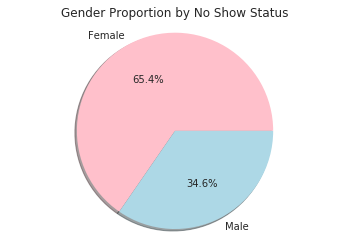

In [23]:
# Pie plot

labels = ['Female', 'Male']
colors = ['pink', 'lightblue']

plt.pie([proportion_nsh_f, proportion_nsh_m], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow = True)
plt.title('Gender Proportion by No Show Status')
plt.axis('equal')
fig = plt.gcf()

> **Figure Summary**
    The plot shows that female patients have a high proportion of no show in the appointment.

Calculate proportion for patients show in their appointment. 

In [24]:
# Total count for patients show
total_count_sh = df.query('show == 1')['show'].count()
total_count_sh

88207

Calculate proportion for each gender show in their appointment. 

In [25]:
# Count for each gender show
show_count = df.query('show == 1')['gender'].value_counts()
show_count

F    57245
M    30962
Name: gender, dtype: int64

In [26]:
# Proportion of Female show
proportion_sh_f = show_count.F/total_count_sh
proportion_sh_f

0.64898477445100733

In [27]:
# Proportion of male show
proportion_sh_m = show_count.M/total_count_sh
proportion_sh_m

0.35101522554899273

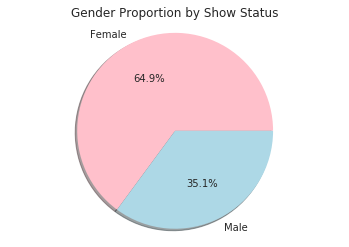

In [28]:
# Pie plot

plt.pie([proportion_sh_f, proportion_sh_m], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow = True)
plt.title('Gender Proportion by Show Status')
plt.axis('equal')
fig = plt.gcf()

> **Figure Summary**
    Similar to the previous plot, The plot shows that female patients' still have a high proportion of show in the appointment. Notice, the percentage of females decreased by 0.4% than the previous plot, while the percentage of male patients increased by 0.5%.

### Question 2: How the distribution of age affected by the patient's show status?

Start with patients no show age distribution.

In [29]:
# All no show patient age 
nshow_age = df.query('show == 0')['age']
nshow_age

6         23
7         39
11        29
17        40
20        30
21         4
22        13
31        12
44        78
48        58
49        27
50        19
51        23
52        23
56        12
61         2
76        28
79        67
90        11
104        0
107       26
116       18
123       31
126       67
128       34
129       22
131       29
132        0
135       30
136       33
          ..
110383    48
110385    23
110386    48
110391    19
110392    38
110394    31
110399    17
110400    36
110401    39
110402    38
110405    33
110415    59
110420    41
110428     8
110429    44
110430    57
110431    12
110432    34
110442     8
110449    12
110461    13
110469    51
110470    26
110479    34
110482    43
110484    45
110492    33
110496    37
110515    33
110516    37
Name: age, Length: 22319, dtype: int64

In [30]:
# All no show patient age 
nshow_age.median(), nshow_age.mean() 

(33.0, 34.317666562121957)

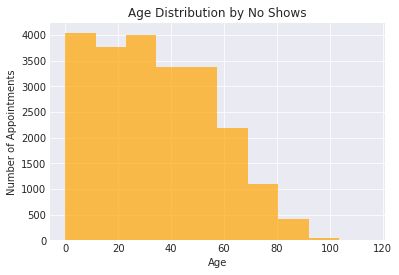

In [31]:
# Histogram plot
plt.hist(nshow_age,color='orange',alpha = 0.7)
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> **Figure Summary**
    The distribution is right-skewed means that the mean is greater than the median and mode. Also, ages from 0-35 have more number of no show in the appointment.

Patients show age distribution.

In [32]:
# All show patient age
show_age = df.query('show == 1')['age']
show_age

0         62
1         56
2         62
3          8
4         56
5         76
8         21
9         19
10        30
12        22
13        28
14        54
15        15
16        50
18        30
19        46
23        46
24        65
25        46
26        45
27         4
28        51
29        32
30        46
32        61
33        38
34        79
35        18
36        63
37        64
          ..
110494    38
110495    40
110497    76
110498    59
110499    66
110500    59
110501    44
110502    22
110503    64
110504     4
110505    55
110506     5
110507     0
110508    59
110509    33
110510    64
110511    14
110512    41
110513     2
110514    58
110517    19
110518    50
110519    22
110520    42
110521    53
110522    56
110523    51
110524    21
110525    38
110526    54
Name: age, Length: 88207, dtype: int64

In [33]:
# All no show patient age 
show_age.median(), show_age.mean() 

(38.0, 37.790504154999034)

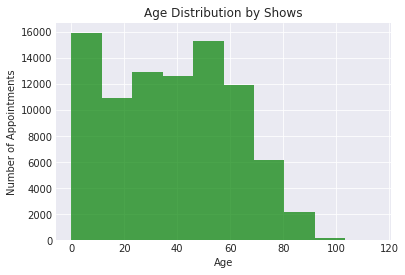

In [34]:
# Histogram plot
plt.hist(show_age,color='green', alpha = 0.7)
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> **Figure Summary**
    Looking at the distribution, it does not show any symmetry. Also, ages 0-10 has a large number of patients show in the appointment, then ages 45-55.

We can see the relationship between show status, age and number of patients in the plot below.

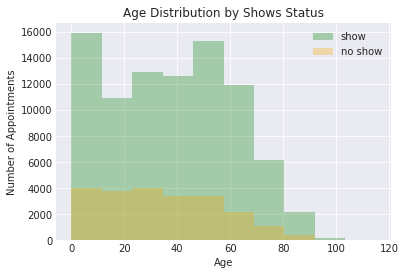

In [35]:
# Bi-variate plo
shown = df.show == 1
nshown = df.show == 0

df.age[shown].hist(color=['green'], alpha = 0.3, label= 'show');
df.age[nshown].hist(color=['orange'], alpha = 0.3, label = 'no show');
plt.title('Age Distribution by Shows Status')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');
plt.legend();

**Note:**
There is a large number of patients show in their appointment compared to no show.

### Question 3: Do receiving SMS messages increase the number of patients show in their appointment?

Show status of patients who did not receive SMS message.

In [36]:
# Counts of patients show status with no SMS
nmsg_count = df.query('sms_received == 0')['show'].value_counts()
nmsg_count


1    62509
0    12535
Name: show, dtype: int64

Prepare data for plotting. 

In [37]:
# Patients show and no SMS
nmsg_show = nmsg_count[1]
nmsg_show

62509

In [38]:
# Patients no show and no SMS
nmsg_nshow = nmsg_count[0]
nmsg_nshow

12535

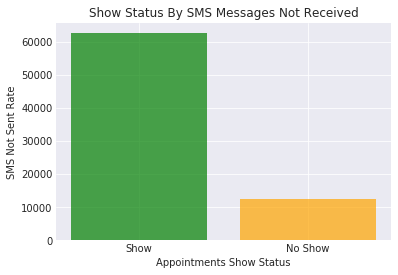

In [39]:
# Bar plot
labels = ["Show","No Show"]
colors = ['green','orange']

plt.bar([1,2], [nmsg_show,nmsg_nshow], color= colors, tick_label = labels, alpha = 0.7)
plt.title('Show Status By SMS Messages Not Received')
plt.xlabel('Appointments Show Status')
plt.ylabel('SMS Not Sent Rate');

Show status of patients who received SMS message.

In [40]:
# Counts of patients show status with SMS
msg_count = df.query('sms_received == 1')['show'].value_counts()
msg_count


1    25698
0     9784
Name: show, dtype: int64

Prepare data for plotting.

In [41]:
# Patients show and SMS
msg_show = msg_count[1]
msg_show

25698

In [42]:
# Patients no show and SMS
msg_nshow = msg_count[0]
msg_nshow

9784

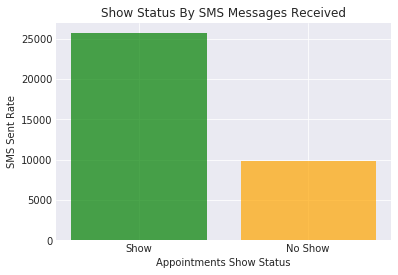

In [43]:
# Bar plot

plt.bar([1,2], [msg_show,msg_nshow], color= colors, tick_label = labels, alpha = 0.7)
plt.title('Show Status By SMS Messages Received')
plt.xlabel('Appointments Show Status')
plt.ylabel('SMS Sent Rate');

> **Figure Summary**
     Both figures above display a high rate of people show whether receiving or not receiving an SMS message.

<a id='conclusions'></a>
## Conclusions

 > The analysis showed two exciting facts. First, a significant proportion of this dataset was female patients. The second thing is most patients shown in their appointment. In addition, the distribution of age by show also revealed that most people that show were from ages 0-10 and 45-55.
 

## Limitaion
> There are a few limitations with data:
     <ol>
      <li>For neighbourhoods data, it would be helpful if the neighbourhoods of patients also provided.</li>
      <li>It would be beneficial if the education of patients also added to the datasets.</li>
    </ol> 


## Submitting your Project 


In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0